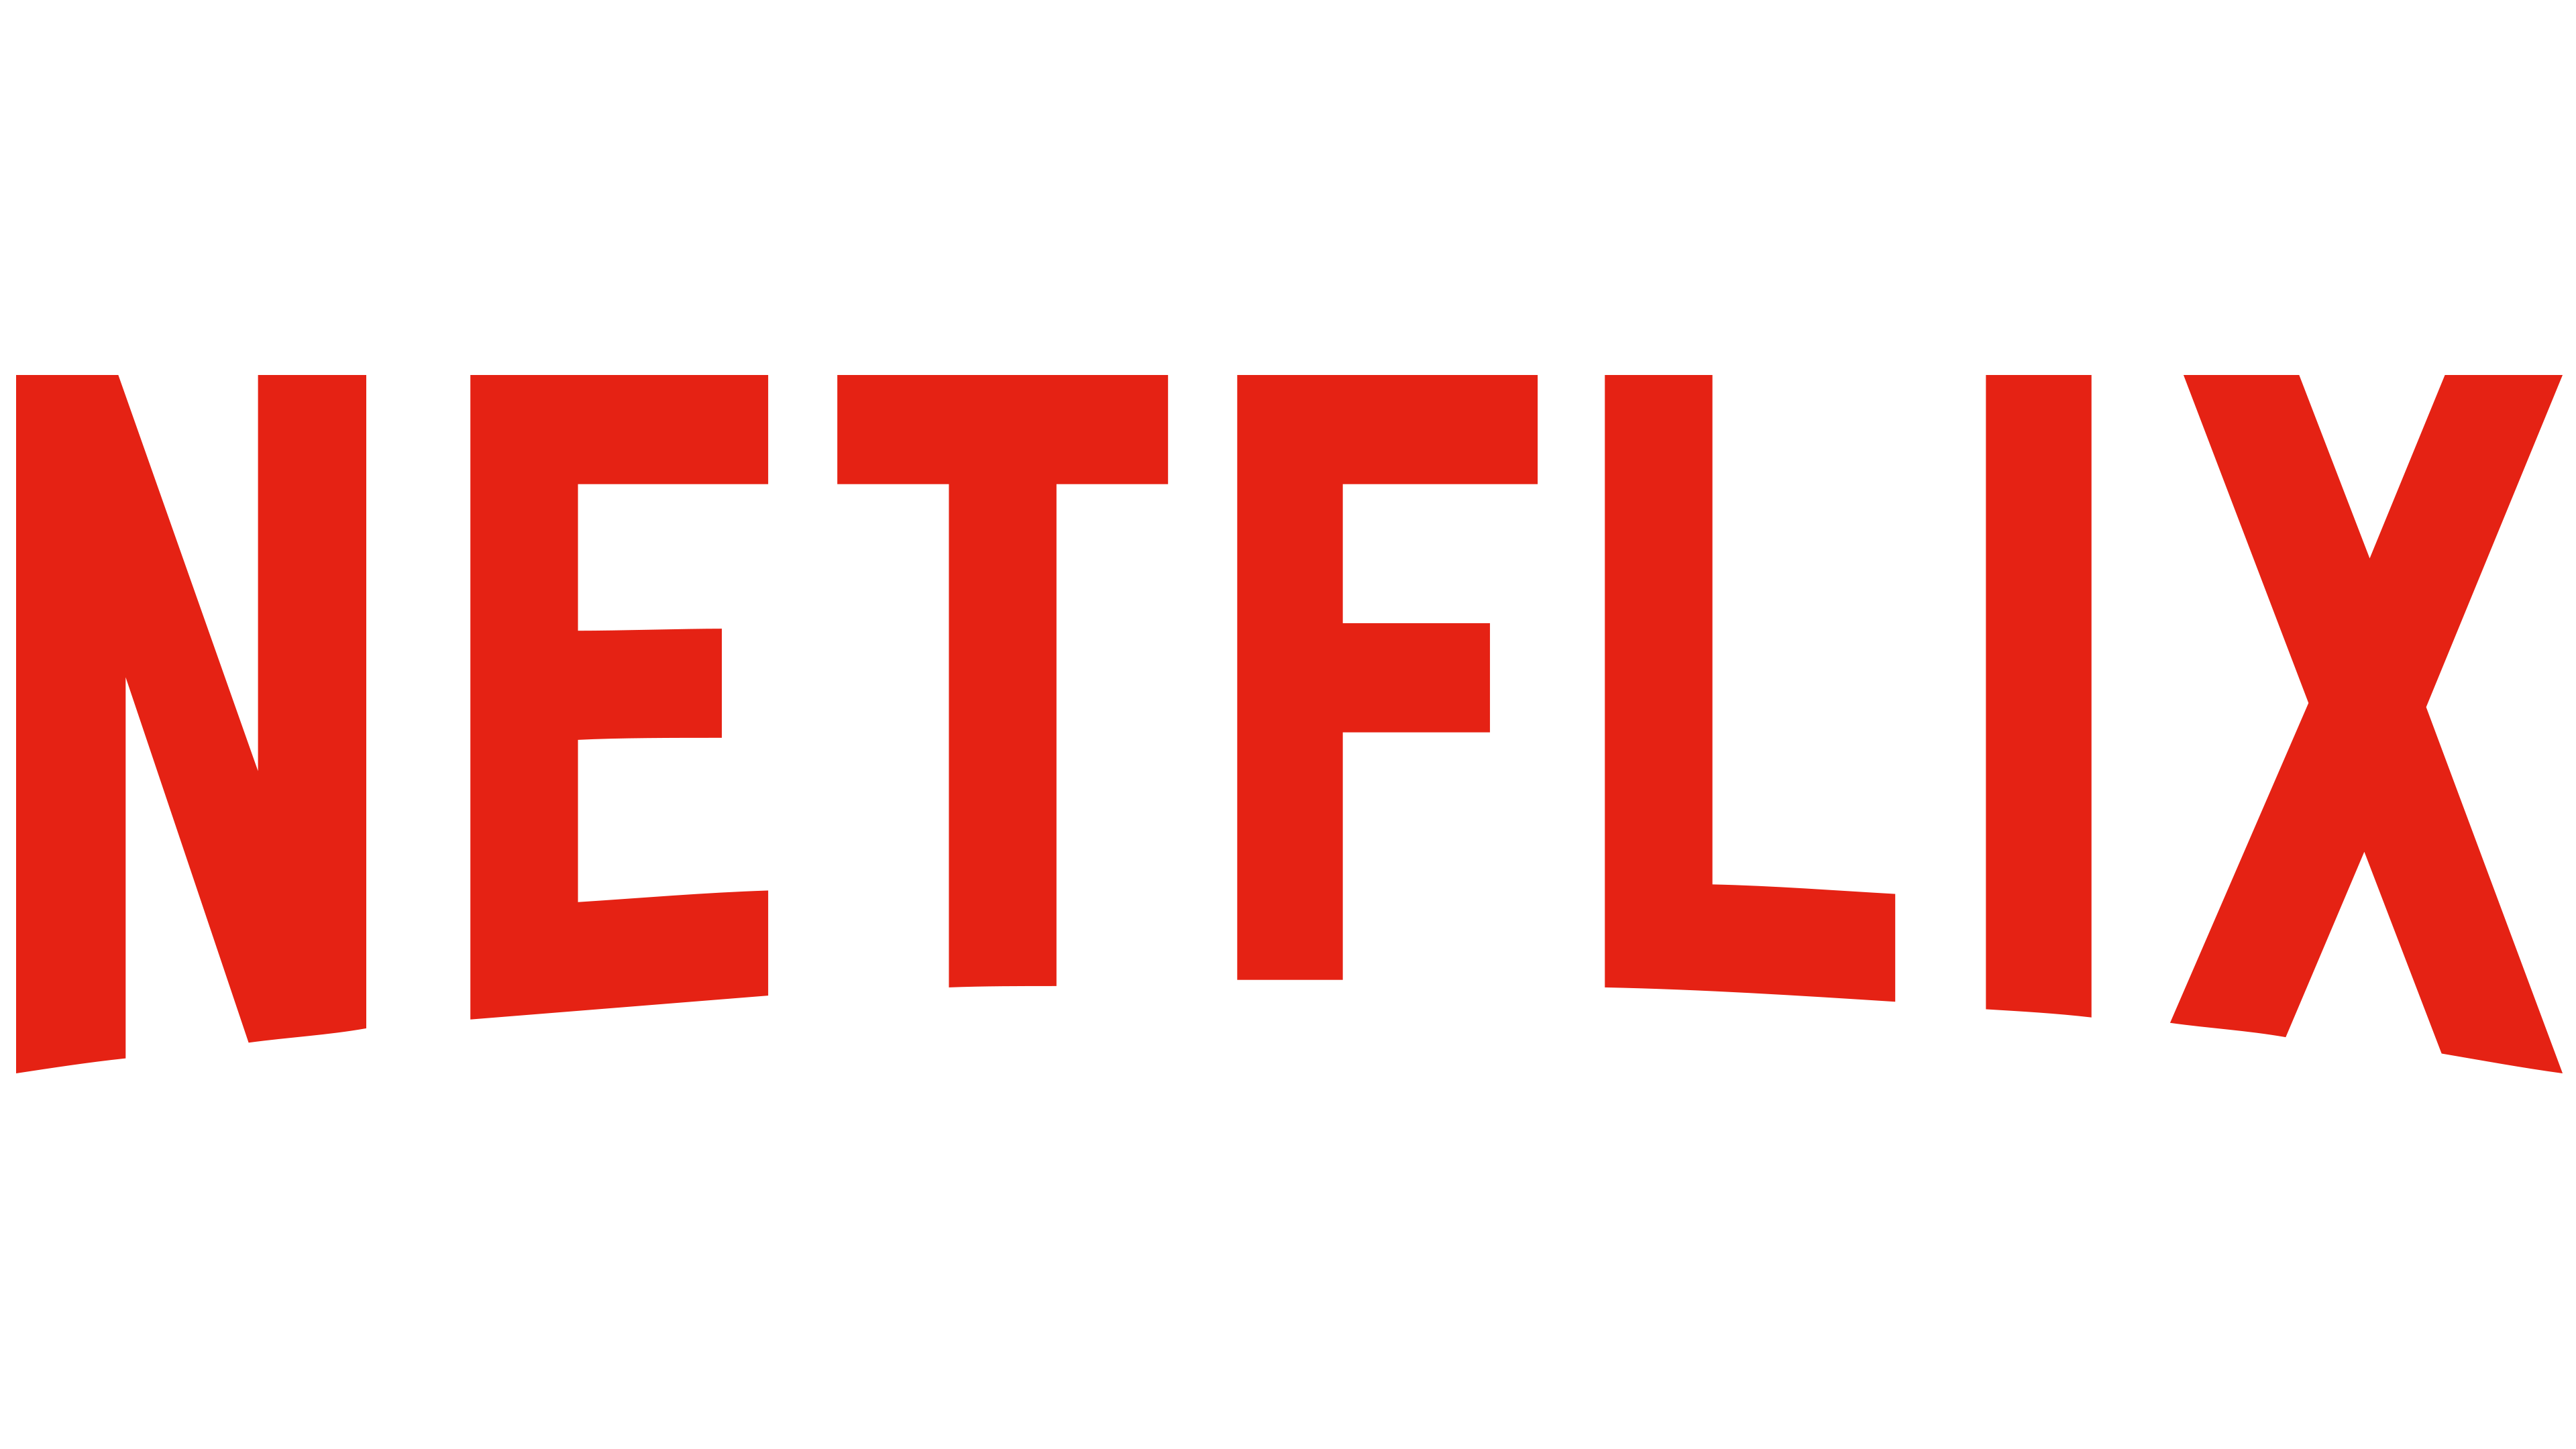

The recent pandemic led to the usage of OTT a lot, here I have tried to do an content analysis of Netflix, this analysis focuses on what content Netflix targets and what is their target audience. I have also done a comparison with their direct competetion Amazon Prime. 

NETFLIX DATASET: (https://www.kaggle.com/datasets/shivamb/netflix-shows).

AMAZON PRIME DATASET: (https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows)





In [2]:
#libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The cleaning of Datasets is done seperately, Netflix followed by Amazon Prime to avoid confusion to readers.

In [3]:
#reading the csv file
data = pd.read_csv(r'netflix_titles.csv')

The data set contains 8807 values spread across 12 Columns


In [5]:
#EDA OF THE DATASET
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#shape of the dataset
data.shape

(8807, 12)

In [7]:
#total values present in the dataset i.e the size of the dataset
data.size

105684

In [6]:
#info of the dataset that shows the count of values in the dataset and the datatype of each coulmn
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
#name of the columns present in the dataset
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [59]:
#cleaning of data
#to check duplicate values
x = data.duplicated().value_counts()
print(x)

#there are no duplicates found in this dataset, if any:
data.drop_duplicates()

False    8807
dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NA,NA,NA,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NA,NA,NA,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [10]:
#now to check if there are any null values in the dataset
nul = data.isnull().sum()
print(nul)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


I have created an heatmap to show where the null values are concentrated more, we can see that it is concentrated more in the director column.

<AxesSubplot:>

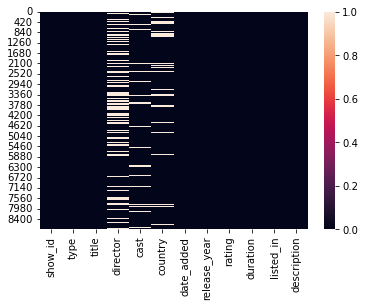

In [64]:
#heatmap to show where the null values are concentrated more
sns.heatmap(data.isnull())

#We can see that the null values are concentrated more in the director column

My aim in any datset is to not remove any data unnecessarily, so we try to retain those null values and fill it with 'NA' indicating only those values are not available. 

In [11]:
data.fillna('NA',inplace = True)
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
#To check how many values we actually don't have, significant number of values are not available in the director column, the available data is 6170 
data['director'].str.contains('NA').sum()


2634

I have saved the file to a CSV file, for the visualisation part I will be using PowerBi.

In [17]:
data.to_csv('netedited.csv',index=False)

In [13]:
data['listed_in'].head(10)

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
5                   TV Dramas, TV Horror, TV Mysteries
6                             Children & Family Movies
7     Dramas, Independent Movies, International Movies
8                         British TV Shows, Reality TV
9                                     Comedies, Dramas
Name: listed_in, dtype: object

If you observe the listed_in(genre) column you can see one TV show can be put under multiple genre, so here I am creating a new dataframe and spliting those genres seperately and mapping them to their show_id so that we do not create a data mess of it.

In [10]:
#listing unpacking and making a dataframe
df_listing = pd.DataFrame()
df_listing['listed_in'] = data['listed_in'].str.split(', ').explode()
df_listing['show_id'] = data['show_id']
df_listing['title'] = data['title']
#to check the count of each category
xyz = df_listing['listed_in'].value_counts()
#print(xyz)
print(df_listing['listed_in'].nunique())

#saving it to a csv file
df_listing.to_csv('df_listing.csv',index = False)

42


It is the same case with the country column so I have followed similar steps and created a new dataframe for it.

In [14]:
#country column unpacking and making a dataframe
df_country = pd.DataFrame()
df_country['country'] = data['country'].str.split(',').explode()
df_country['show_id'] = data['show_id']
df_country['title'] = data['title']
countt = df_country['country'].value_counts().head(10)
print(countt)
df_country['country'].nunique()


#Saving it to CSV file
df_country.to_csv('df_country.csv')

United States     3211
India             1008
NA                 831
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
 France            181
Name: country, dtype: int64


198

In this duration table we can observe that Movies and TV Shows are in the same column i.e it is in min and seasons, so I have created to seprate dataframes respectively to remove 'min' and 'season' and convert it to numerical type for easy calculation.

In [17]:
#creating duration table for movies
duration_df = pd.DataFrame()
duration_df['show_id'] = data['show_id']
duration_df['duration'] = data['duration'].replace(['Season 1','Season 2','Season 3','Season 4','Season 5','Season 6','Season 7','Season 8','Season 9','Season 10','3 Seasons','4 Seasons','5 Seasons','6 Seasons','7 Seasons','8 Seasons','9 Seasons','10 Seasons','17 Seasons','1 Season','2 Seasons','900','1200','1500','1800','2100','2400','2700','3000','5100'],np.nan)
duration_df['duration'] = duration_df['duration'].str.split(" ").str.get(0)
duration_df.dropna(inplace = True)
duration_df['duration']

#saving it as a CSV file
duration_df.to_csv("dmovies.csv")

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6140, dtype: object

In [43]:
#creating duration table for TVShow
tv_df = pd.DataFrame()
tv_df['Seasons'] = data['duration'].str.split(' ').str.get(0)
#I have replaced those 3 values with average seasons of the available dataset
tv_df['Seasons'].replace("NA",np.nan,inplace = True)
tv_df["Seasons"].fillna("1.8",inplace = True)
tv_df['Seasons'] = pd.to_numeric(tv_df['Seasons'])
tv_df['Seasons'] = tv_df[(tv_df["Seasons"]>=1) & (tv_df['Seasons']<=17)]
tv_df['show_id'] = data['show_id']
tv_df.dropna(inplace = True)
tv_df.count()

tv_df.to_csv("tvduration.csv")

Seasons    2702
show_id    2702
dtype: int64

AMAZON PRIME DATASET AND DATA CLEANING

In [44]:
data_am = pd.read_csv('amazon_prime_titles.csv')

In [45]:
data_am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [1]:
data_am.tail(5)

NameError: name 'data_am' is not defined

In [47]:
#to check duplicate values
data_am.duplicated().value_counts()

False    9668
dtype: int64

In [48]:
#To check the number of NULL values
data_am.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

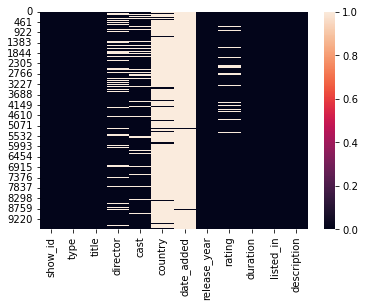

In [51]:
sns.heatmap(data_am.isnull())

In [52]:
#Filling the null values with NA
data_am.fillna("NA",inplace = True)
data_am.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [53]:
#genre table

lista_df = pd.DataFrame()
lista_df['genre'] = data_am['listed_in'].str.split(', ').explode()
lista_df['show_id'] = data_am['show_id']
#grouping it accoriding to show_id
groupd = lista_df.groupby('show_id')
groupd['genre'].value_counts()
lista_df['genre'].nunique()

#CSV Genre Table
#lista_df.to_csv('amazongenre.csv')
#sql: select show_id,count(genre) from lista_df group by show_id

31

In [55]:
#Duration in min
dur_df = pd.DataFrame()
#data_am[data_am['duration'].str.contains('Seasons')]
#Keeping the dataset to min and season differently
dur_df['dmin'] = data_am['duration'].replace(['11 Seasons','12 Seasons','14 Seasons','15 Seasons','21 Seasons','1 Season','Season 1','2 Seasons','3 Seasons','4 Seasons','5 Seasons','6 Seasons','7 Seasons','8 Seasons','9 Seasons','10 Seasons','19 Seasons','29 Seasons'],np.nan)
dur_df.dropna(inplace = True)
dur_df[dur_df['dmin'].str.contains('Season')]

#Now removing the min in the table and convert it into numeric type
dur_df['dmin'] = dur_df['dmin'].str.split(' ').str.get(0)
dur_df['dmin'] = pd.to_numeric(dur_df['dmin'])
dur_df.dtypes

dur_df['show_id'] = data_am['show_id']

dur_df['dmin'].head()

#creating a CSV file for the duration_min:
#dur_df.to_csv('amazonmovie.csv')


0    113
1    110
2     74
3     69
4     45
Name: dmin, dtype: int64

In [56]:
#Creating a timeframe table for TV Show for seasons
dur_tv = pd.DataFrame()
dur_tv['Seasons'] = data_am['duration'].str.split(' ').str.get(0)
dur_tv['Seasons'] = pd.to_numeric(dur_tv['Seasons'])
#What I have done here is, we know that seasons are between the number 1 to 29, so I have only selected those and eliminated the rest which are in minutes
dur_tv['Seasons'] = dur_tv[(dur_tv['Seasons']>=1) & (dur_tv['Seasons']<=29)]
dur_tv['show_id'] = data_am['show_id']

#to reference if the code has matchded the correct show_id
dur_tv

#We can see it has created NaN values to the empty spaces so we drop those values
dur_tv.dropna(inplace = True)
#These are the number of TV Shows that are present
dur_tv.count()

Seasons    2204
show_id    2204
dtype: int64

In [57]:
#Country Table
countrydf = pd.DataFrame()
#filling up the null values in the dataset
data_am['country'].fillna("NoData",inplace = True)
data_am['country'].isnull().unique()

#seperating the values 
countrydf['country'] = data_am['country'].str.split(',').explode()
countrydf['country'].nunique()
countrydf['show_id'] = data_am['show_id']
countrydf.head()

,country,show_id
0,Canada,s1
1,India,s2
2,United States,s3
3,United States,s4
4,United Kingdom,s5


I have done the Visualisation part of this dataset using PowerBi, I will insert images of the report and I have attached the file of the report at the start.

Since Netflix debuted in 1997, the streaming market started to soar in 2015 and 2016 with tremendous growth as they were gradually released in international countries. Netflix Movies and TV Shows Analytics dashboards detail the growth of international digital contents on Netflix over the years. It helps users understand and study the development of the streaming services ecosystem that is associated with each content/genre/maturity rating type/IMDB rating, segmented based on different factors.

 

Introduction Page: This Page was designed for users to navigate easily through the sections
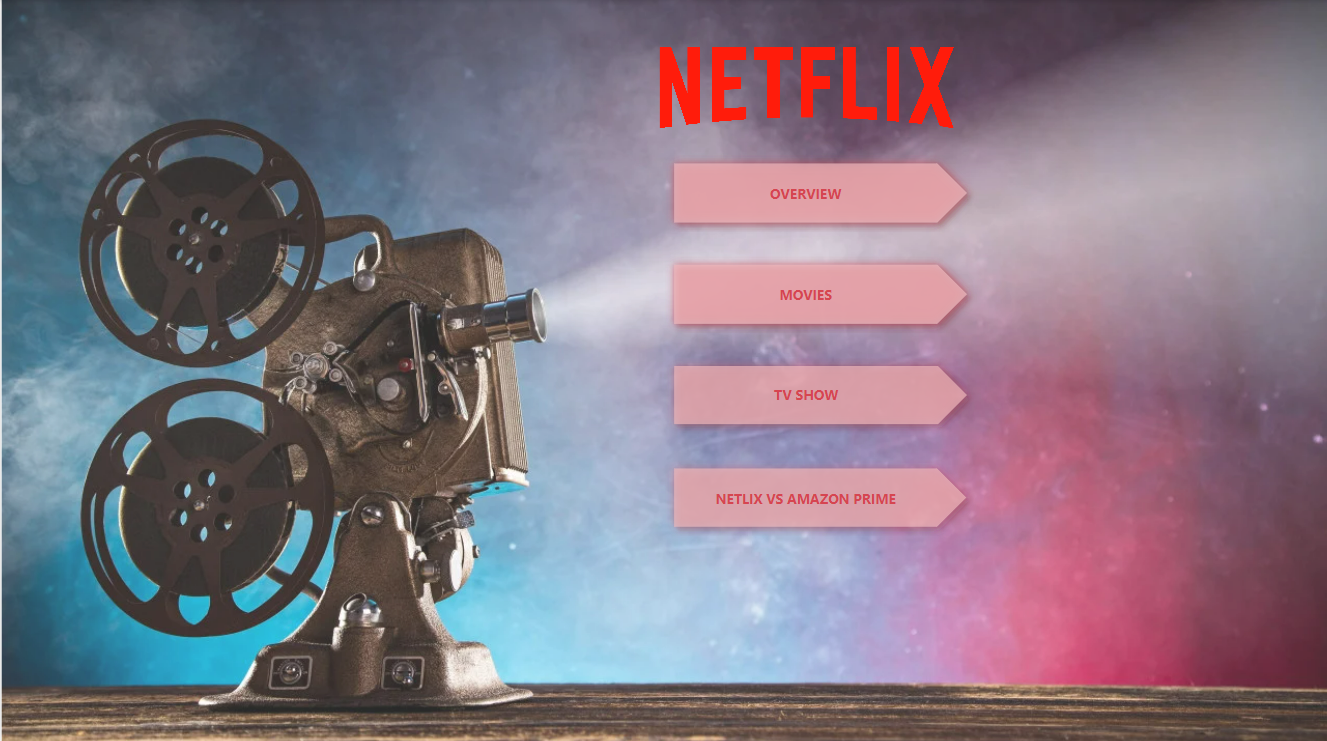

Overview Of Data:

1)Out of the total available data, we can clearly see that Netflix has a lot more Movies(6131) in it's list compared to the TV Shows(2676).

2)There has been a change in approch to this from Netflix from the year 2016, it is slowly shifting it's attention to add TV Shows, the pandemic was an added advantage to their change, so we can see there is a slight rise in the number of TV shows added from 2018 - 2020.

3)Since Netflix is based off USA, the number of content producers is significantly more there a total of 3211, which is followed by India.

4)Netflix has focused on the International Movie genre to attract crowd all over the world, focus is to increase their target audience seeing the number of International Movies are more in it's content list.

5)The average duration of a Movie in Netflix is 103.74 minutes and where as a TV show averages 1.82, this indicates that Netflix understands that people don't have time to sit for long hours.



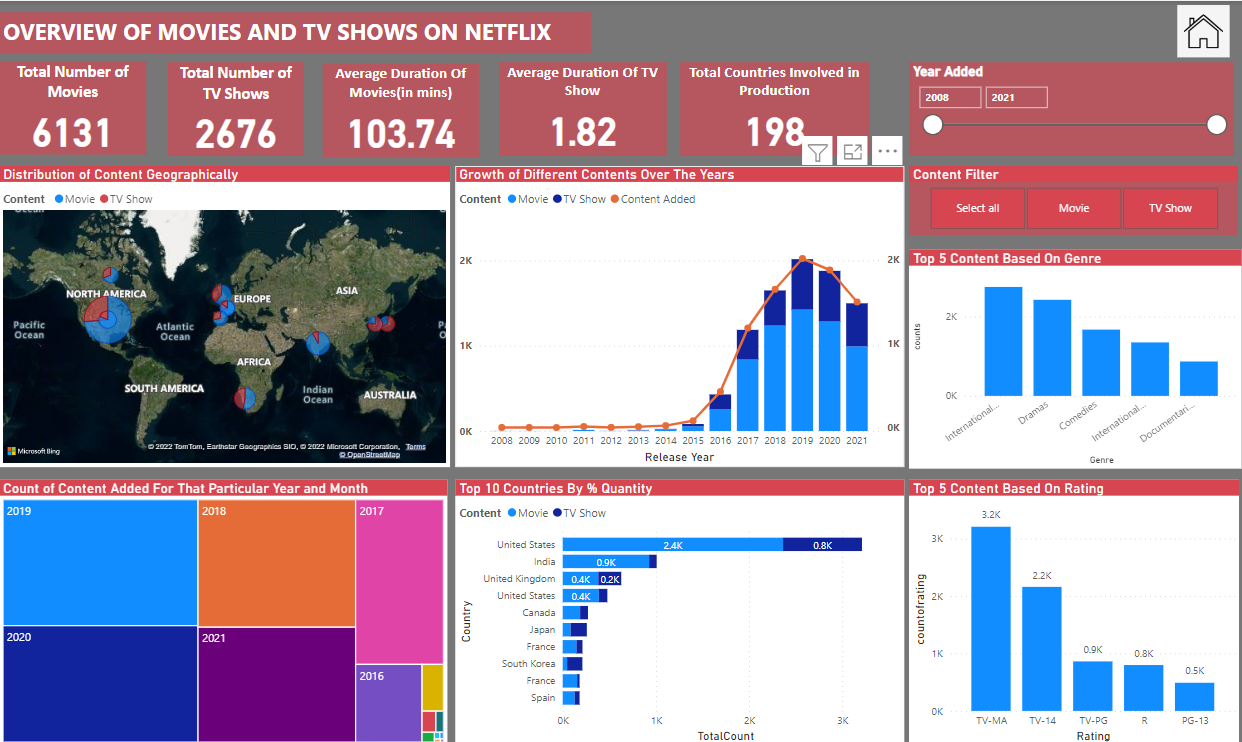

MOVIE ANALYSIS:

Note: I have grouped the ratings as Kids, Teens, Mature and the Unavailable data as Others.

      Kids: G,TV-G,TV-Y,TV-Y7,TV-Y7-FV
      Teen: PG, PG-13,TV-14,TV-PG
      Mature: R,NC-17,NR,TV-MA,UR
      
1)Netflix focuses largerly on the Mature group category, it shows that Netflix is targeting the group of 18-40+. It shows that there is a large section of people in this age group who are addicted to watching Movies.

2)The line graph also clearly indicates there is a significantly higher number of Movies that is being added of the maturity content in recent years.

3)Director Rajiv Chilika has a total of 19 Movies which is available in Netflix making him the highest.

4)Top 3 Genre's are International Movie, Dramas and Comedy.

5)The longest movie is Black Mirror which is 312 minutes long. The average movie duration in Netflix is concentrated in the region of 100-120 minutes.

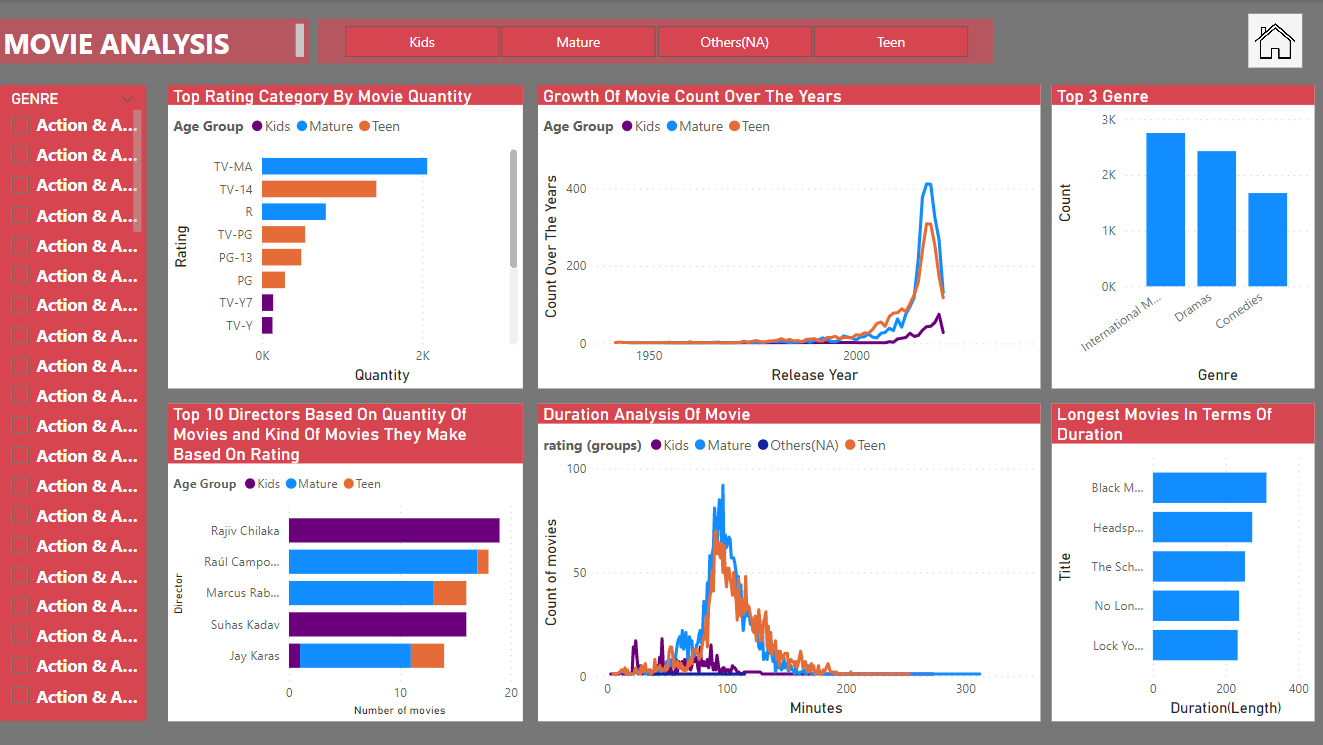

TV SHOW ANALYSIS:

1)The TV Shows have a good balance of Content in them focusing on all kinds of Groups, Netflix has been trying to expand it's wings to all categories and there is a significant improvement towards that.


2)The duration of a TV Show might be a subject to disscussion since people tend to get attracted to the characters having short duration TV Show might not exactly be the right way to go about it, the average being close to 2. Netflix might want to look into that.


3)The longest TV Show Netflix has is Grey's Anatomy, John Was Trying To Contact Aliens, The Claudia Kishi Club and What did Jack Do?


4)As I mentioned the percentage of division is good Mature(43.05%) toping the list compared to  Kids(17.41%) and Teen(39.46)

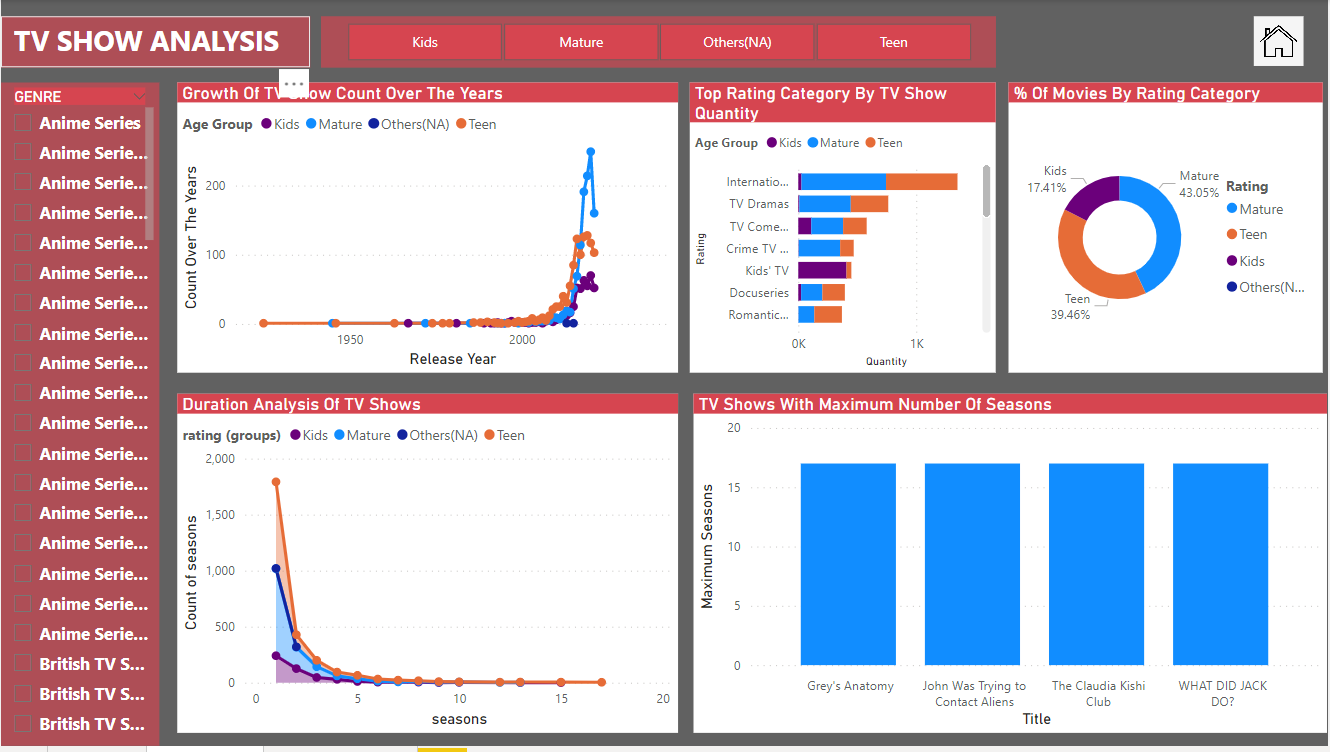


NETFLIX VS AMAZON PRIME CONTENT ANALYSIS:

1)Netflix has a total content of 8807, Amazon Prime has 9668 which includes both TV Show and Movies. Amazon holding a slight edge in this.

2)Netflix has an average duration of 103.74 min compared to 94.07 min of Amazon Prime, the difference comes in the TV Show duration, Amazon prefers shows which are longer averaging 4.20, this is a plus point considering people get attached to the shows.

3)We can see a dip in content added from the year 2020 to 2021 in Netflix where has the graph of Amazon has not dipped and continues to grow.

4)The major differnece we can see is the target audience, Netflix prefers to target the Mature audience(18+) whereas Amazon targets the Teen group(7-18), very interesting approach taken by Amazon to target this section, I feel teens might get distracted and not focus on their career or studies given the lack of maturity at that age.

5)Netflix has stated previously targets International genre whereas Amazon targets the Drama genre, the one common genre between the two is comedy.


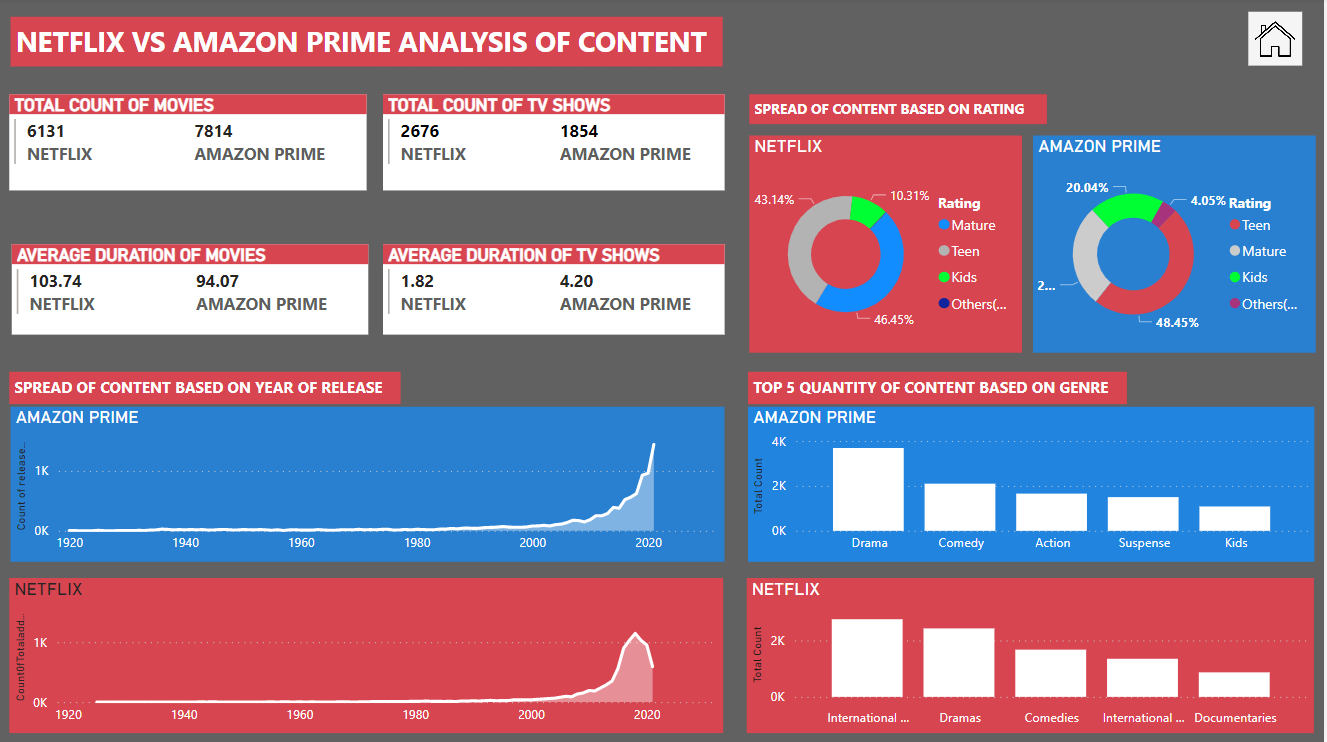

Note:

Although the dashboard provides a fundamental understanding of the content ecosystem on Netflix, the analytics could go much deeper if I am able to access users' data(ex: user subscription, user experience, user behavior, etc), which is usually not open to public due to confidentiality. As a next step, if I can break through the limitations of data, I may be able to provide more insights to help connect content usability with user data to discuss more in-depth insights for potential business growth opportunities.

 Thank You for reading, I hope you liked it.
 
 C Varun

 